In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import cross_decomposition

%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%run ./skills.py # contains subsetSkills, createCountryPenRates
%run ./fileWork.py # contains complIndexClean
%run ./plsMain # contains pls (need boxCox) 
%run ./boxCox.py 

In [3]:
# Set variables for rest of exercise
baseFile = '../00_originalData/li_country_industry_det_skill_2016.tsv'
skillName = 'std_skill_name'
threshold = 0.001
#li = pd.read_csv(basefile, sep='\t')
skillPen = readLimitMergeSkills(baseFile=baseFile,
                                skillName=skillName,
                                threshold=threshold)

Original file

   country_sk  industry_sk  skill_id             std_skill_name  hire_ct  \
0         239           96      1101            public speaking        3   
1         239           -9      1164       instructional design        3   
2         239           57      1004                 completion        3   
3         239           -9       344  administrative assistance        5   
4         239           -9      3526              water quality        0   

   skill_member_ct  member_ct  penetration_rate  hiring_rate  
0               34        192           0.17708      0.08824  
1               64      10731           0.00596      0.04688  
2              117        746           0.15684      0.02564  
3               79      10731           0.00736      0.06329  
4               35      10731           0.00326      0.00000  

Number of individual skills without censoring (beyond LI's rule of 30)
(32835,)

Skill with minimum number of global members given threshold:
penRate

In [4]:
subsetSkills = pd.read_csv('../02_data/subsetSkillKnowledge.csv')
skillPen = skillPen[subsetSkills['std_skill_name']]

In [5]:
outcomes = complIndexClean(pd.read_csv('../02_data/H0_2016.csv')).rename(columns={'exporter' : 'iso3'})
outcomes.head()
# The following reads and cleans the Compl Index data and merges ECI to skill pen rates
#penRatesOutcome = skillPenToOutcome(skillPen=skillPen, outcome=outcome)

,iso3,eci
0,ABW,0.240282
1241,AFG,-1.254752
2482,AGO,-1.193203
3723,AIA,1.517758
4964,ALB,-0.509574


In [6]:
# The following reads and cleans the Compl Index data and merges ECI to skill pen rates
penRatesOutcome = skillPenToOutcome(skillPen=skillPen,
                            outcome=outcomes)

In [7]:
penRatesOutcome.shape
penRatesOutcome.columns
penRatesOutcome.head()

(137, 588)

Index(['country', '.net framework', '2g', '3g', 'abap', 'accounting',
       'active directory', 'active server pages (asp)', 'administrative law',
       'adobe acrobat',
       ...
       'windows server', 'windows xp', 'wireless networking',
       'wireless technologies', 'wordpress', 'workers compensation',
       'working with brokers', 'xhtml', 'xml', 'eci'],
      dtype='object', length=588)

,country,.net framework,2g,3g,abap,accounting,active directory,active server pages (asp),administrative law,adobe acrobat,...,windows server,windows xp,wireless networking,wireless technologies,wordpress,workers compensation,working with brokers,xhtml,xml,eci
country_sk,,,,,,,,,,,,,,,,,,,,,
3,Afghanistan,0.002344,0.009477,0.015462,0.000000,0.075116,0.025787,0.000000,0.002045,0.000000,...,0.029328,0.004140,0.005935,0.021896,0.003242,0.000000,0.000000,0.000000,0.005237,-1.254752
6,Albania,0.009084,0.006534,0.010837,0.000000,0.101873,0.018645,0.000000,0.016972,0.001514,...,0.034821,0.004064,0.005378,0.015817,0.016693,0.000000,0.000000,0.001514,0.015896,-0.509574
62,Algeria,0.002045,0.011743,0.016935,0.001852,0.036278,0.008917,0.000000,0.001017,0.000707,...,0.014098,0.001584,0.001830,0.018219,0.003993,0.000000,0.000000,0.000632,0.006391,-0.856621
9,Angola,0.003318,0.002179,0.004525,0.000000,0.068311,0.017162,0.000000,0.002078,0.000000,...,0.030904,0.002682,0.002346,0.011128,0.001575,0.000000,0.000000,0.000000,0.003352,-1.193203
11,Argentina,0.018538,0.000967,0.003494,0.004616,0.049919,0.011497,0.003591,0.007140,0.002977,...,0.021155,0.004957,0.002538,0.013560,0.013611,0.000273,0.001732,0.002027,0.019792,-0.125922


In [9]:
temp=penRatesOutcome.drop(['country', 'eci'], axis=1).apply(stats.skewtest)
print('Ditstibution of p values for skewness test of penetration rate regressors')
pd.Series([i[1] for i in temp]).describe()
print('\n\nSkewness for ECI')
stats.skewtest(penRatesOutcome['eci'])
print('\n\nDistribution of values for ECI')
penRatesOutcome['eci'].describe()

Ditstibution of p values for skewness test of penetration rate regressors


count    5.860000e+02
mean     1.397480e-03
std      1.877500e-02
min      5.299617e-46
25%      1.580534e-20
50%      1.697018e-13
75%      2.656291e-09
max      4.097087e-01
dtype: float64



Skewness for ECI


SkewtestResult(statistic=0.25792647342740016, pvalue=0.79646365310173795)



Distribution of values for ECI


count    137.000000
mean      -0.009020
std        1.023887
min       -2.491868
25%       -0.789738
50%       -0.074578
75%        0.773159
max        2.257342
Name: eci, dtype: float64

In [10]:
X = penRatesOutcome.drop(['country', 'eci'], axis=1)
y = penRatesOutcome['eci'] # 'empl2016'
estimator = pls(X=X, y=y)

In [11]:
estimator.best_estimator_


Pipeline(memory=None,
     steps=[('linear', PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06))])

In [12]:
reg = cross_decomposition.PLSRegression(n_components=estimator.best_estimator_.steps[0][1].n_components)

In [13]:
fitted = reg.fit(X, y)

In [14]:
fitted.score(X, y)

0.89709891678559706

In [15]:
fitted.x_rotations_.shape
fitted.x_rotations_[:10]
pd.DataFrame(fitted.x_rotations_).describe()
fitted.y_rotations_

fitted.x_scores_.shape
pd.DataFrame(fitted.x_scores_).describe()
fitted.y_scores_.shape
pd.DataFrame(fitted.y_scores_).describe()

(586, 6)

array([[ 0.04168124,  0.0120889 ,  0.08297092, -0.03627532,  0.05711213,
        -0.01219844],
       [-0.03978086,  0.11334124,  0.13857773, -0.13957759,  0.14768783,
         0.11554112],
       [-0.02956367,  0.09561047,  0.13270671, -0.1293931 ,  0.1292352 ,
         0.08121334],
       [ 0.05162895, -0.05058502, -0.04824023,  0.09225633, -0.07735584,
        -0.01595992],
       [-0.0073318 ,  0.08486613,  0.00172786, -0.01167704,  0.00214072,
         0.00173525],
       [ 0.02699961,  0.07110275,  0.03712878, -0.00646955, -0.04069318,
        -0.08153455],
       [ 0.04560317, -0.01302847, -0.00823719,  0.0307136 , -0.00542382,
        -0.00817275],
       [ 0.01348814, -0.00964083,  0.0128827 , -0.06324029,  0.10496283,
         0.03604996],
       [ 0.05045752, -0.01496508, -0.05027608,  0.03889498, -0.00434037,
         0.02416038],
       [ 0.06332415, -0.04478711, -0.07452886,  0.0461085 , -0.05067799,
        -0.08940571]])

,0,1,2,3,4,5
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.036044,0.007932,0.001323,0.001802,0.002549,0.001404
std,0.020198,0.041518,0.047574,0.058218,0.052769,0.051167
min,-0.039781,-0.079921,-0.116728,-0.141255,-0.159036,-0.166070
25%,0.023606,-0.021976,-0.032732,-0.039985,-0.033198,-0.032567
50%,0.039109,0.004152,-0.001059,0.003841,0.002015,-0.002085
75%,0.050939,0.034942,0.031388,0.043734,0.041811,0.033508
max,0.070759,0.121107,0.143897,0.182574,0.147688,0.152999


array([ 1.])

(137, 6)

,0,1,2,3,4,5
count,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,1.296611e-16,-2.593222e-17,2.755298e-17,2.957893e-16,-7.455512e-17,1.164924e-16
std,1.350538e+01,6.486333e+00,5.003470e+00,4.147892e+00,3.934040e+00,2.988433e+00
min,-1.740998e+01,-1.273743e+01,-1.029148e+01,-1.540841e+01,-1.379957e+01,-9.070738e+00
25%,-1.107949e+01,-4.419717e+00,-2.513725e+00,-2.593718e+00,-2.110729e+00,-1.720123e+00
50%,-2.247063e+00,-7.747668e-01,-3.319666e-01,-4.688730e-01,1.931969e-01,8.353050e-03
75%,7.358957e+00,4.502328e+00,1.659195e+00,2.826527e+00,2.078670e+00,1.326027e+00
max,5.322403e+01,1.886121e+01,3.327920e+01,1.227637e+01,1.309832e+01,1.325452e+01


(137, 6)

,0,1,2,3,4,5
count,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,1.166950e-16,-4.473307e-16,-1.329026e-16,1.604556e-16,-3.111866e-16,-4.136999e-16
std,1.729337e+01,1.171416e+01,1.040868e+01,7.276302e+00,9.523784e+00,8.762323e+00
min,-4.193508e+01,-3.079743e+01,-2.079005e+01,-2.227291e+01,-2.564448e+01,-2.412470e+01
25%,-1.318625e+01,-6.884856e+00,-6.745064e+00,-4.398991e+00,-5.979491e+00,-5.714967e+00
50%,-1.107270e+00,-4.760555e-01,-2.673895e-01,7.287282e-01,-4.381146e-01,-1.934944e-01
75%,1.321094e+01,6.888813e+00,6.440204e+00,5.009654e+00,6.226977e+00,5.533507e+00
max,3.827867e+01,3.580130e+01,3.215188e+01,1.721523e+01,3.030907e+01,2.971239e+01


In [17]:
temp = pd.Series(np.absolute(fitted.y_loadings_[0])).sort_values(ascending=False)

pc = pd.DataFrame(fitted.x_rotations_.T,  columns = penRatesOutcome.drop(
    ['country', 'eci'], axis=1).columns)
pc.index.names = ['yLoads']
pc.index = fitted.y_loadings_[0]
pc

,.net framework,2g,3g,abap,accounting,active directory,active server pages (asp),administrative law,adobe acrobat,adobe creative suite,...,windows communication foundation (wcf),windows server,windows xp,wireless networking,wireless technologies,wordpress,workers compensation,working with brokers,xhtml,xml
0.057826,0.041681,-0.039781,-0.029564,0.051629,-0.007332,0.027000,0.045603,0.013488,0.050458,0.063324,...,0.036888,0.026321,0.019317,-0.005441,0.020660,0.045783,0.013566,0.042060,0.043368,0.045687
-0.053319,0.012089,0.113341,0.095610,-0.050585,0.084866,0.071103,-0.013028,-0.009641,-0.014965,-0.044787,...,0.032181,0.054926,0.057468,0.098065,0.030481,-0.028208,0.051969,0.014255,-0.029589,-0.021063
-0.049967,0.082971,0.138578,0.132707,-0.048240,0.001728,0.037129,-0.008237,0.012883,-0.050276,-0.074529,...,0.102325,0.037896,0.000531,0.074155,0.059126,0.004590,0.024393,-0.061396,-0.036720,0.018274
0.062678,-0.036275,-0.139578,-0.129393,0.092256,-0.011677,-0.006470,0.030714,-0.063240,0.038895,0.046109,...,-0.047996,-0.014625,0.008315,-0.055776,-0.015039,0.015160,-0.048343,0.038235,0.094143,0.055786
-0.039344,0.057112,0.147688,0.129235,-0.077356,0.002141,-0.040693,-0.005424,0.104963,-0.004340,-0.050678,...,0.051836,0.004886,-0.019858,0.103189,-0.031004,0.055326,0.016524,-0.039148,0.009193,-0.002110
-0.038944,-0.012198,0.115541,0.081213,-0.015960,0.001735,-0.081535,-0.008173,0.036050,0.024160,-0.089406,...,-0.012882,-0.039592,-0.000699,0.147625,0.017074,-0.020965,0.077277,-0.049853,-0.051059,-0.076816


,0
2g,-0.034327
synchronous digital hierarchy (sdh),-0.031770
gsm,-0.031382
3g,-0.029796
computer network operations,-0.024387
wireless networking,-0.022554
informatica,-0.020402
database administration,-0.020046
telecommunications,-0.019983
commercial lending,-0.019778


,0
corporate governance,0.029641
integrated circuits (ic),0.027120
os x,0.026847
enterprise risk management,0.026770
semiconductors,0.024941
cloud computing,0.022838
ios,0.022679
objective-c,0.022544
hadoop,0.022433
oracle e-business suite,0.021714


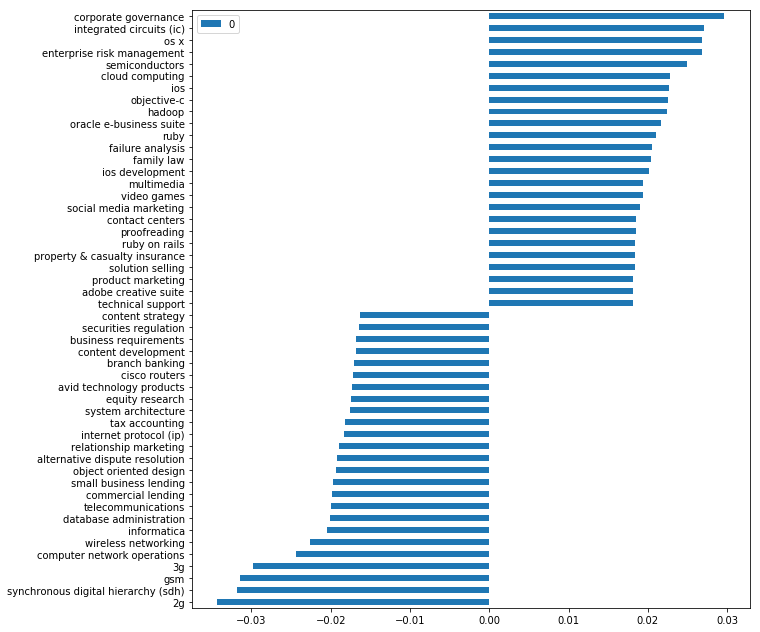

In [18]:
skillEffects = pd.Series(fitted.y_loadings_[0].dot(pc), index=pc.columns)

temp = pd.DataFrame(skillEffects).sort_values(by=0)
bins = np.arange(np.min(temp[0]), np.max(temp[0]) + 0.001, 0.001)
temp.head(25)
temp.tail(25).sort_values(by=0, ascending=False)

temp.head(25).append(temp.tail(25)).sort_values(by=0, ascending=True).plot(kind='barh', figsize=(10,11))

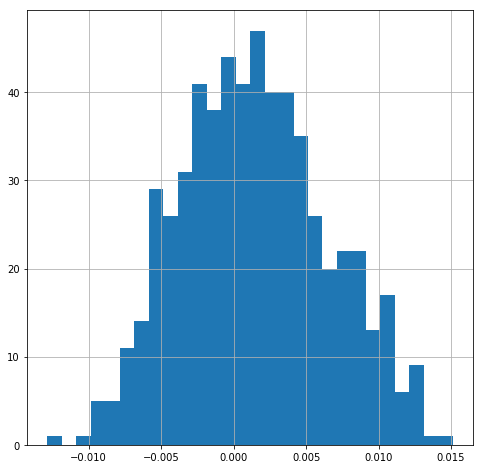

In [25]:
skillEffects.hist(bins=bins, figsize=(8,8))

right_only    34334
both            586
left_only         0
Name: _merge, dtype: int64

,skillEffect,skill_name,parent_skill_name,_merge


,skillEffect
parent_skill_name,
finance,-0.169971
telecommunications,-0.154744
computer_networking,-0.084947
writing,-0.029825
real_estate,-0.013101
data_management,-0.009334
information_management,-0.008525
project_management,-0.005497
urban_planning,-0.005269


,skillEffect
parent_skill_name,
information_technology,0.166571
insurance,0.151726
software_development,0.142754
business_strategy,0.122377
system_administration,0.078115
sales,0.051984
graphic_design,0.044522
marketing,0.043880
electrical_engineering,0.039107


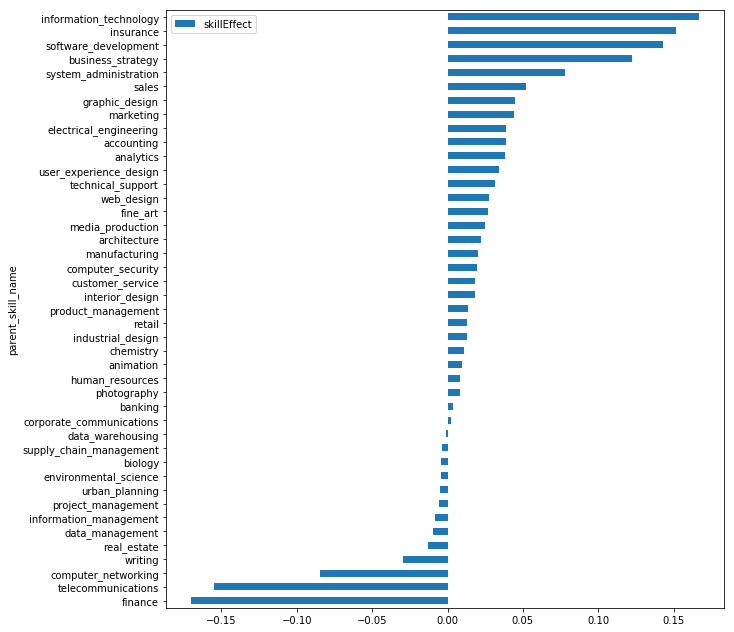

In [19]:
skillMaps = pd.read_csv('../00_originalData/li_parent_skill_map.tsv', sep='\t')[
             ['skill_name', 'parent_skill_name']]
skillMaps['skill_name'] = skillMaps['skill_name'].str.replace('_', ' ')

merged = pd.merge(pd.DataFrame(skillEffects, columns=['skillEffect']),
        skillMaps, left_index=True, right_on='skill_name',
        how='outer', indicator=True)
merged._merge.value_counts()
merged[merged._merge == 'left_only'].head() # orthopedic surgery, critical care nursing

parentSkillEffect = merged[['skillEffect', 'parent_skill_name']].groupby(
    by='parent_skill_name').sum()

parentSkillEffect = parentSkillEffect.sort_values(by=['skillEffect'])
parentSkillEffect[parentSkillEffect['skillEffect'] < 0]
parentSkillEffect[parentSkillEffect['skillEffect'] > 0].sort_values(by='skillEffect', ascending=False)

parentSkillEffect[parentSkillEffect['skillEffect'] < 0].append(
    parentSkillEffect[parentSkillEffect['skillEffect'] > 0]).plot(kind='barh', figsize=(10,11))

<Container object of 1582 artists>

Text(0.5,1,'Vector 1 (coef: 0.05992517484999305)')

<Container object of 1582 artists>

Text(0.5,1,'Vector 0 (coef: 0.03448804300974614)')

<Container object of 1582 artists>

Text(0.5,1,'Vector 2 (coef: 0.030773049453155725)')

<Container object of 1582 artists>

Text(0.5,1,'Vector 4 (coef: 0.030357298308546273)')

<Container object of 1582 artists>

Text(0.5,1,'Vector 3 (coef: 0.028190030731607377)')

<Container object of 1582 artists>

Text(0.5,1,'Vector 5 (coef: -0.023203549636067845)')

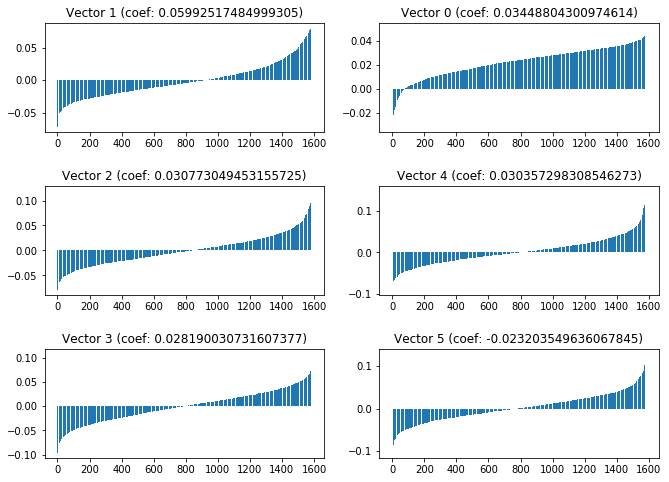

In [228]:
plt.figure(figsize=(11,8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for position in np.arange(0, estimator.best_estimator_.steps[0][1].n_components):
    component = temp.index[position]
    plt.subplot(3,2, position + 1)
    plt.bar(np.arange(0, pc.iloc[component].shape[0]), pc.iloc[component].sort_values())
    plt.title('Vector {} (coef: {})'.format(component, pc.index[component]))

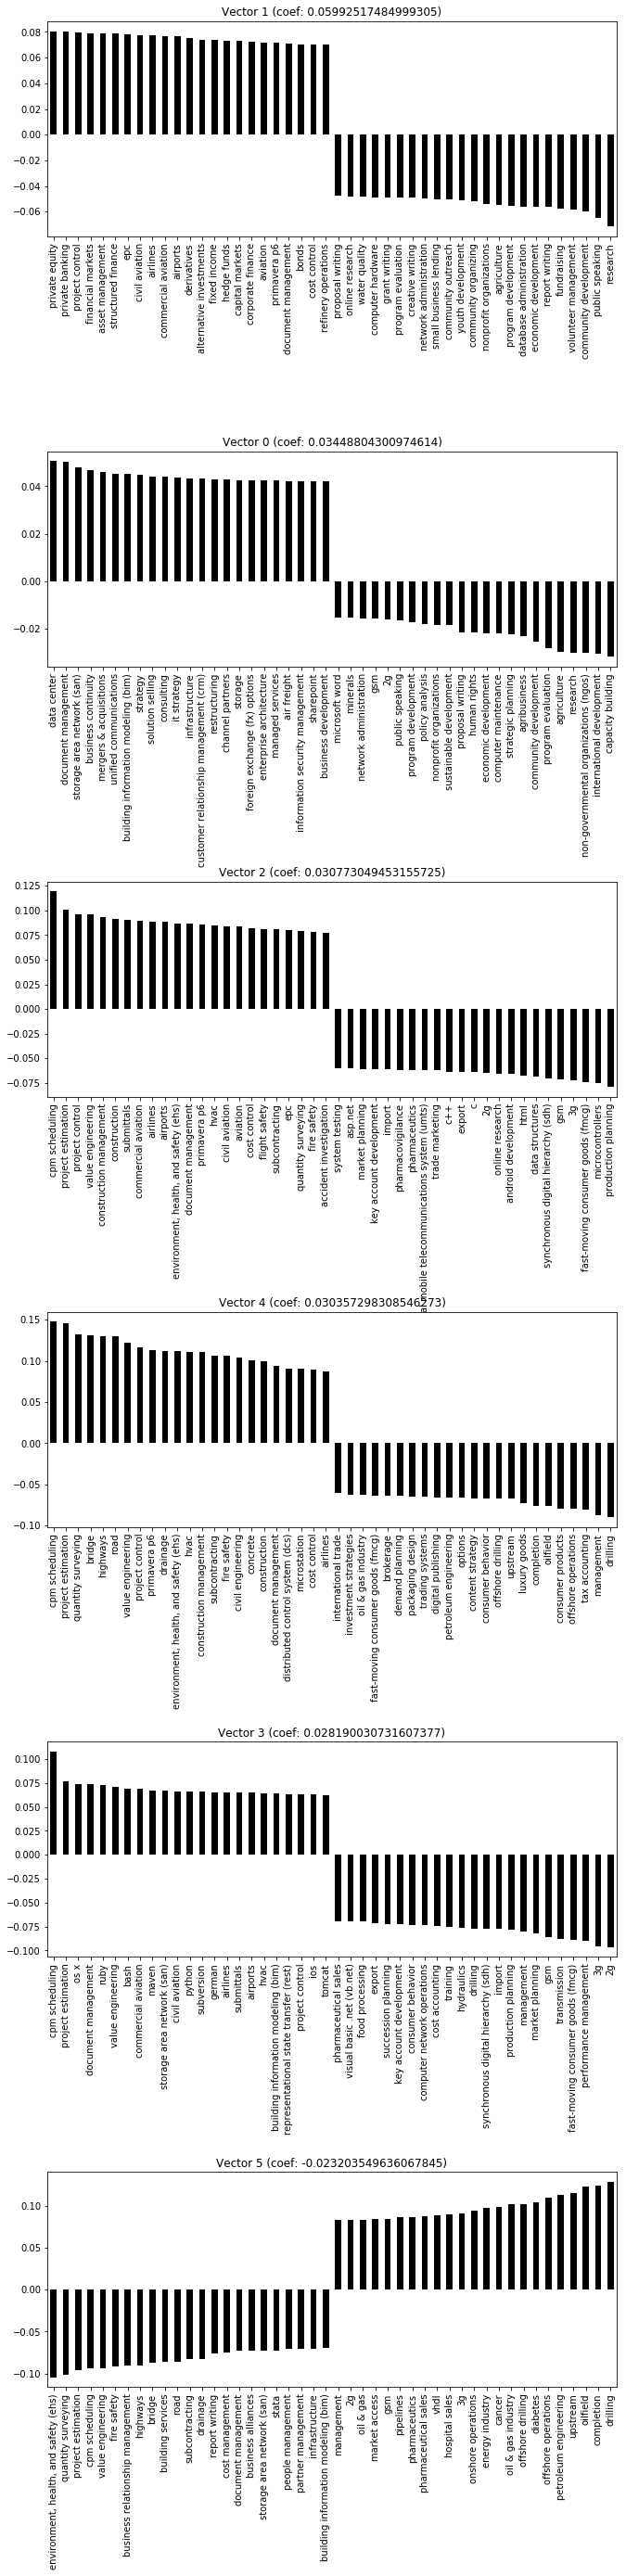

In [230]:
plt.figure(figsize=(11, 64))
plt.subplots_adjust(wspace=0.2, hspace=1.0)

components = pc.iloc[temp[0:estimator.best_estimator_.steps[0][1].n_components].index]
for i in np.arange(0, components.shape[0]):
    if pc.index[temp.index[i]] < 0:
        ascend = True
    else:
        ascend = False
    component = components.iloc[i].sort_values(ascending=ascend)
    component = component.iloc[0:23].append(component.iloc[-23:])
    plt.subplot(8,1, i + 1)
    component.plot.bar(colormap='gist_gray', 
                       title='Vector {} (coef: {})'.format(temp.index[i], pc.index[temp.index[i]]))
